In [2]:
'''Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housinghousing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.'''

'Create a Linear Regression Model using Python/R to predict home prices using Boston Housing\nDataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains\ninformation about various houses in Boston through different parameters. There are 506 samples\nand 14 feature variables in this dataset.\nThe objective is to predict the value of prices of the house using the given features.'

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import pandas as pd

df = pd.read_csv('housing.csv')

print(df) 

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
5    6.430   5.21     18.7  602700.0
6    6.012  12.43     15.2  480900.0
7    6.172  19.15     15.2  569100.0
8    5.631  29.93     15.2  346500.0
9    6.004  17.10     15.2  396900.0
10   6.377  20.45     15.2  315000.0
11   6.009  13.27     15.2  396900.0
12   5.889  15.71     15.2  455700.0
13   5.949   8.26     21.0  428400.0
14   6.096  10.26     21.0  382200.0
15   5.834   8.47     21.0  417900.0
16   5.935   6.58     21.0  485100.0
17   5.990  14.67     21.0  367500.0
18   5.456  11.69     21.0  424200.0
19   5.727  11.28     21.0  382200.0
20   5.570  21.02     21.0  285600.0
21   5.965  13.83     21.0  411600.0
22   6.142  18.72     21.0  319200.0
23   5.813  19.88     21.0  304500.0
24   5.924  16.30     21.0  327600.0
25   5.599  16.51     21.0  291900.0
2

In [29]:
print(min(df.MEDV))

-2.1150363354602986


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df[['RM', 'LSTAT','PTRATIO','MEDV']] = scaler.fit_transform(df[['RM', 'LSTAT','PTRATIO','MEDV']])
''' fit_transform() is used on the training data so that we can scale the training data and also 
learn the scaling parameters of that data. Here, the model built by us will learn the mean and 
variance of the features of the training set. These learned parameters are then used to scale our test data. '''

In [28]:
print(df)

           RM     LSTAT   PTRATIO      MEDV
0    0.520554 -1.125077 -1.525083  0.300640
1    0.281048 -0.537070 -0.339748 -0.004498
2    1.469245 -1.259357 -0.339748  1.661047
3    1.178417 -1.413427  0.086973  1.495764
4    1.410146 -1.075605  0.086973  1.851759
5    0.295045 -1.092567  0.086973  0.898202
6   -0.355041 -0.072035 -1.572497  0.160785
7   -0.106204  0.877822 -1.572497  0.694777
8   -0.947584  2.401552 -1.572497 -0.652916
9   -0.367483  0.588059 -1.572497 -0.347778
10   0.212618  1.061574 -1.572497 -0.843628
11  -0.359707  0.046697 -1.572497 -0.347778
12  -0.546335  0.391586 -1.572497  0.008216
13  -0.453021 -0.661456  1.177482 -0.157067
14  -0.224402 -0.378760  1.177482 -0.436777
15  -0.631872 -0.631773  1.177482 -0.220637
16  -0.474794 -0.898920  1.177482  0.186213
17  -0.389256  0.244584  1.177482 -0.525776
18  -1.219750 -0.176633  1.177482 -0.182495
19  -0.798282 -0.234585  1.177482 -0.436777
20  -1.042453  1.142143  1.177482 -1.021625
21  -0.428137  0.125852  1.17748

In [9]:
df1 = df[df.MEDV<750000]
X = df1.drop(['MEDV'], axis=1)   # took all columns except the last one
y = df1.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)           
y_pred = lm.predict(X_test)
print('predicted response:', y_pred)

predicted response: [-9.06329799e-01 -3.89181885e-01  6.91896076e-01  1.88419705e+00
  1.34247885e-01  6.66880770e-01 -4.37397138e-01  7.50142477e-01
 -8.31856018e-01  3.46646457e-01  1.37088062e-01  6.50021390e-01
 -1.62143170e-01  8.24771885e-01 -2.03106200e+00 -5.45020050e-01
  4.56309378e-01  1.19399795e-01  1.00475705e+00  7.27745587e-01
  5.28367524e-02 -3.57991041e-01 -7.68151336e-01  9.98932583e-01
  1.68015130e+00 -3.67460730e-01 -4.67574606e-01 -5.11281436e-01
 -8.15726297e-01 -1.09841383e-01  1.30588954e+00  1.13863481e+00
  1.17614519e+00  9.52029539e-01  7.29814057e-01  7.87140337e-01
  6.51888024e-01  7.39622207e-01  1.55274463e+00  2.38855747e-01
 -2.96773654e-01 -3.78205740e-01 -3.34768273e-01  2.97095757e-01
 -1.59435884e+00 -1.11756299e-01  4.05444495e-01  4.71545656e-01
  6.17561268e-01  5.15549598e-01  1.94951277e-01 -2.95512859e-01
 -1.78865473e-01  1.04367017e+00 -5.05522721e-01 -1.73162492e-01
 -3.43025450e-01  4.96123100e-01  1.68532239e+00  7.05287832e-02
 -6.2

Text(0.5,1,'Real prices vs predictions')

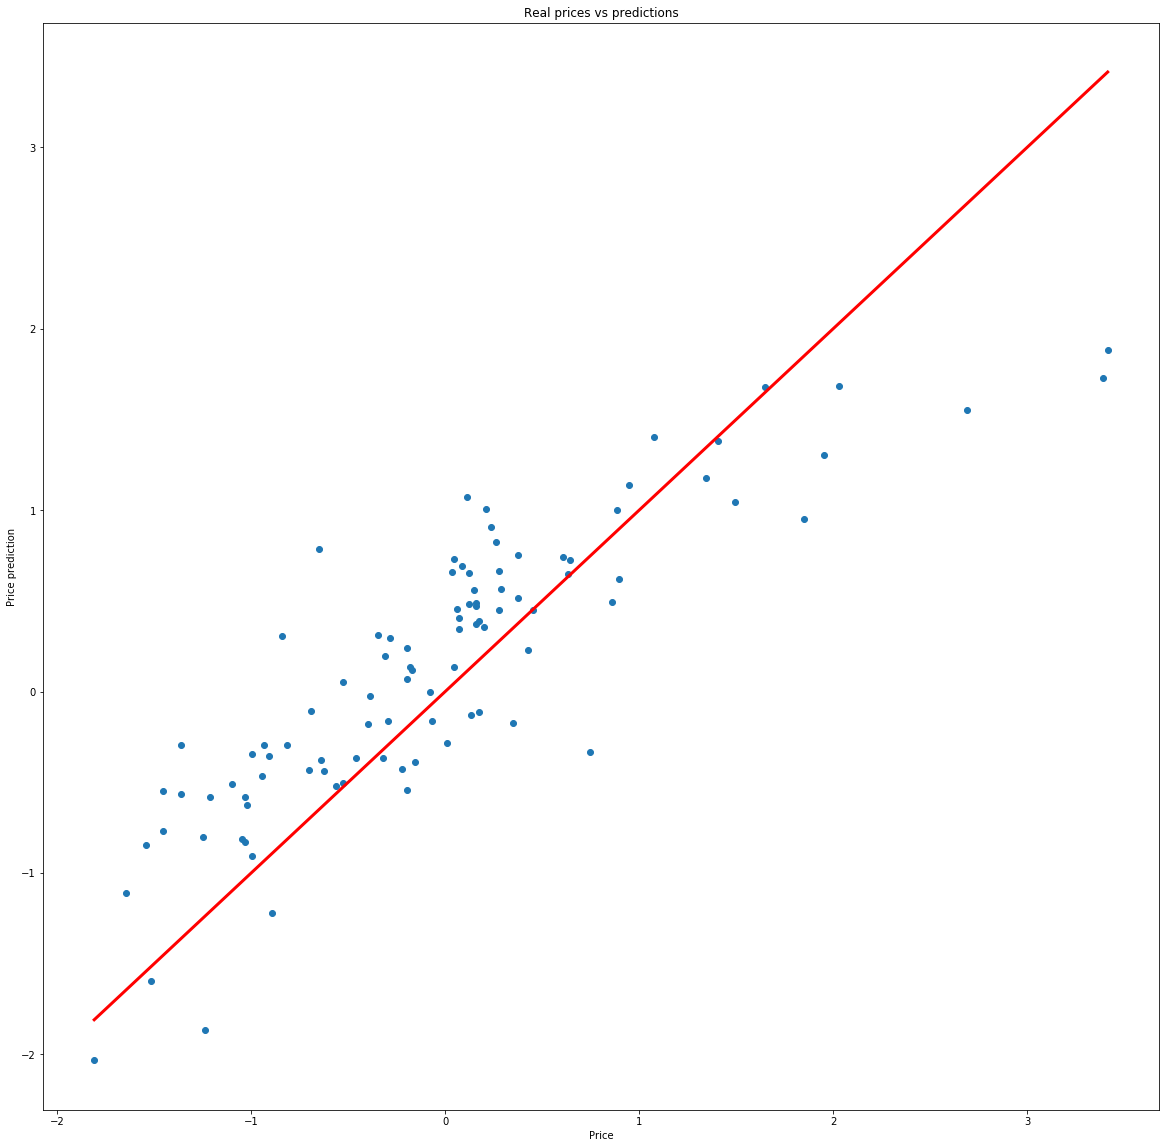

In [14]:
plt.figure(figsize=(20,20))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Price")
plt.ylabel("Price prediction")
plt.title("Real prices vs predictions")

In [15]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))


0.5431955502306306


In [16]:
print(lm.score(X_test,y_test))


0.7042069943455351


In [17]:
print("Accurcy:", lm.score(X_test, y_test))

Accurcy: 0.7042069943455351


In [22]:
y_pred = lm.predict(X_test)
print('predicted response:', y_pred)

predicted response: [-9.06329799e-01 -3.89181885e-01  6.91896076e-01  1.88419705e+00
  1.34247885e-01  6.66880770e-01 -4.37397138e-01  7.50142477e-01
 -8.31856018e-01  3.46646457e-01  1.37088062e-01  6.50021390e-01
 -1.62143170e-01  8.24771885e-01 -2.03106200e+00 -5.45020050e-01
  4.56309378e-01  1.19399795e-01  1.00475705e+00  7.27745587e-01
  5.28367524e-02 -3.57991041e-01 -7.68151336e-01  9.98932583e-01
  1.68015130e+00 -3.67460730e-01 -4.67574606e-01 -5.11281436e-01
 -8.15726297e-01 -1.09841383e-01  1.30588954e+00  1.13863481e+00
  1.17614519e+00  9.52029539e-01  7.29814057e-01  7.87140337e-01
  6.51888024e-01  7.39622207e-01  1.55274463e+00  2.38855747e-01
 -2.96773654e-01 -3.78205740e-01 -3.34768273e-01  2.97095757e-01
 -1.59435884e+00 -1.11756299e-01  4.05444495e-01  4.71545656e-01
  6.17561268e-01  5.15549598e-01  1.94951277e-01 -2.95512859e-01
 -1.78865473e-01  1.04367017e+00 -5.05522721e-01 -1.73162492e-01
 -3.43025450e-01  4.96123100e-01  1.68532239e+00  7.05287832e-02
 -6.2

In [23]:
print(X_test)

           RM     LSTAT   PTRATIO
457 -1.264851  0.735061  0.798174
107 -0.176190  0.162602  1.130068
165  0.251499 -0.228931 -1.809564
197  2.508139 -1.290454 -1.809564
446  0.424130 -0.374520  0.798174
164  0.122415 -0.260028 -1.809564
459  0.379028  0.811389  0.798174
173  0.116194 -0.939911 -0.908709
34  -0.224402  1.046026  1.177482
322  0.117749 -1.026133  0.798174
67  -0.563442 -0.684072  0.181800
85   0.606092 -0.905988 -0.007854
260 -0.597657  0.008533  0.039560
230  0.374362 -0.930017 -0.908709
370 -1.928935  2.692729  0.798174
452 -0.820055  0.257305  0.798174
300 -0.183966 -0.983729 -0.055267
298 -0.417250 -0.419751 -0.055267
159  0.419464 -0.784429 -1.809564
213  1.105321 -0.456502 -0.529401
334 -0.351931 -0.340596  0.134386
31  -0.261727  0.014187  1.177482
362 -0.026887  1.249567  0.798174
284  0.680743 -0.942738 -1.193189
192  1.607660 -0.893266 -2.805245
128  0.296601  0.346354  1.272309
404 -0.364372  0.390172  0.798174
432  0.274827  0.900438  0.798174
142 -1.302177 

In [25]:
print('predicted response:', y_predprint(y_test)

457   -0.996197
107   -0.157067
165    0.084501
197    3.415591
446   -0.182495
164    0.275212
459   -0.627488
173    0.376925
34    -1.034339
322    0.071786
67     0.046358
85     0.631206
260   -0.068068
230    0.262498
370   -1.809898
452   -0.195209
300    0.059072
298   -0.169781
159    0.211641
213    0.643920
334   -0.525776
31    -0.907198
362   -1.453904
284    0.885488
192    1.648333
128   -0.462205
404   -0.945340
432   -1.097909
142   -1.047053
304   -0.691059
         ...   
256    0.148071
29    -0.080783
172    0.198927
453   -0.220637
409   -1.453904
330    1.406766
246    0.033644
102   -0.385921
287    0.109929
358   -0.843628
315    0.173499
208    0.427781
90     0.122643
303    0.275212
434   -0.818200
394   -0.563918
110    0.008216
347    0.135357
469   -0.322350
250    1.076199
420   -1.644615
6      0.160785
412   -1.542902
11    -0.347778
486    0.287926
92     0.160785
385   -1.212336
119   -0.296922
261    0.453209
428   -1.250478
Name: MEDV, Length: 98, 